<a href="https://colab.research.google.com/github/Roger8886/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day3 運用資料與特徵優化分析
著重在「資料」與「特徵」的觀點來進行探索與優化

載入所需套件以及資料

In [10]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [15]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

使用info()函式觀察train以及test資料是否有空值，
發現train的Age,Cabin,Embark有空值以及Test的Age, Fare, cabin有空值的情況，
之後要想辦法來補這些空值。

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


使用describe()來觀察train以及test的資料分布

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


接下來由於要對整體資料做一些觀察，因此先將資料做合併
combine train and test data

In [35]:
df_data = df_train.append(df_test)
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


由於使用append合併之後會造成index重複問題，因此要將index重新設定

In [36]:
df_data.reset_index(inplace=True, drop=True)

#資料分析

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

接下來要對資料開始做一些觀察以及分析。首先分析生存以及死亡的比例是否有相當大的落差，發現大概死亡的比例是6成、生存的比例大概是4成

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


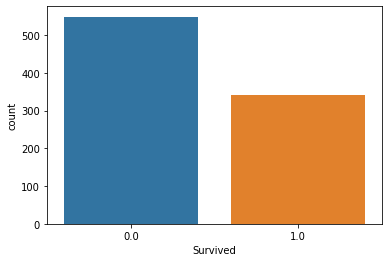

In [37]:
sns.countplot(df_data['Survived'])

觀察艙等跟生存率的關係，可以發現在1艙等的生存率最高、再來是2艙等、最後是3艙等的

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


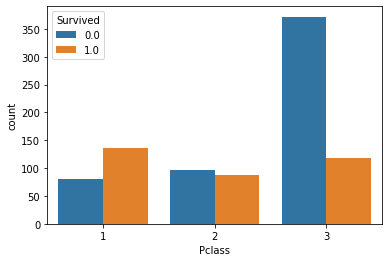

In [38]:
sns.countplot(df_data['Pclass'], hue=df_data['Survived'])

再來是觀察性別跟生存率的關係，發現女生生存率是男生的好幾倍。可能是在逃難的時候先讓女生以及小孩先搭船

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


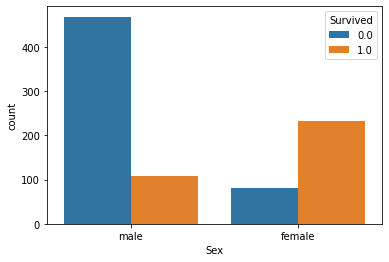

In [39]:
sns.countplot(df_data['Sex'],hue=df_data['Survived'])

出發港口跟生存率的差異，可以發現S港出發的都比較容易死亡，其原因可能是S城市出發的人買的票價都比較便宜。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


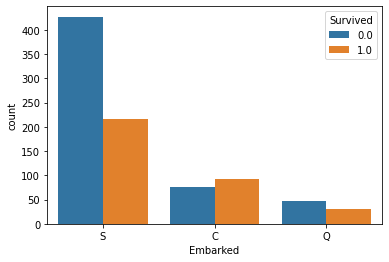

In [40]:
sns.countplot(df_data['Embarked'], hue=df_data['Survived'])

年齡跟生存率的關係，可以發現的確年齡小的存活比例高出許多。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


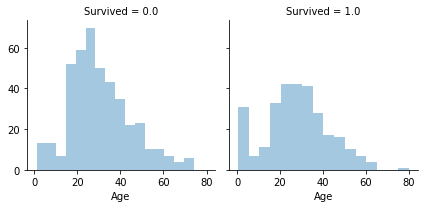

In [41]:
g = sns.FacetGrid(df_data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

票價跟生存率的關係，可以發現票價低的乘客死亡率高出許多。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


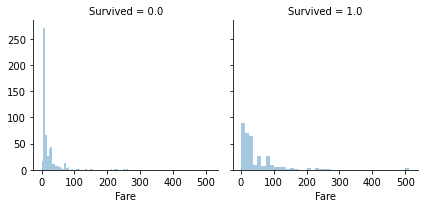

In [42]:
g = sns.FacetGrid(df_data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

父母＋小孩的數量跟生存率的關係，發現沒有跟父母小孩一起來的生存率比起有跟父母小孩來的低

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


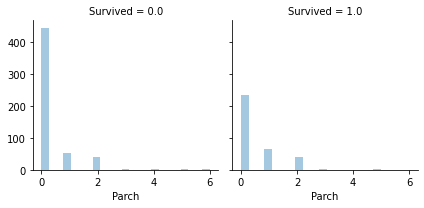

In [43]:
g = sns.FacetGrid(df_data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

兄弟姊妹＋丈夫妻子的數量跟生存率的關係，發現沒有帶兄弟姊妹＋丈夫妻子一起來的生存率比起有跟兄弟姊妹＋丈夫妻子來的低

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


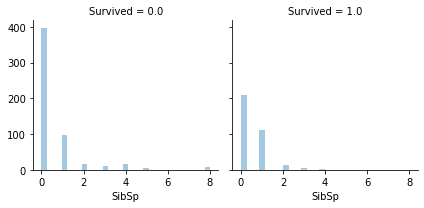

In [44]:
g = sns.FacetGrid(df_data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？

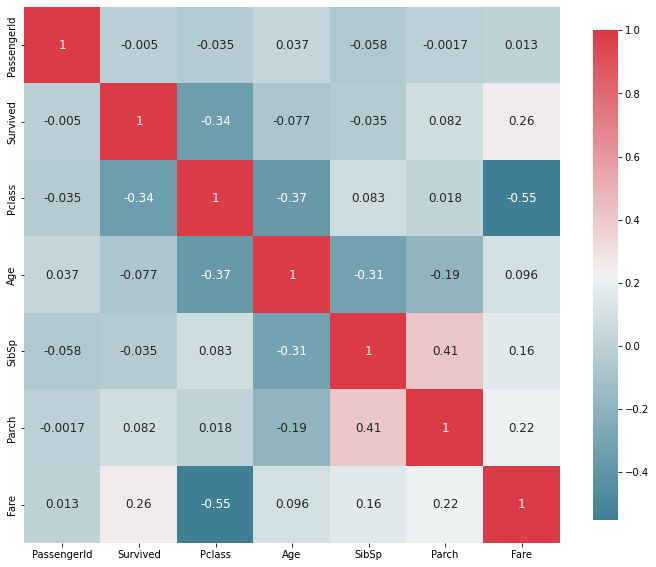

In [34]:
corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

利用 corr( ) 函數，計算特徵欄位彼此間的相關係數，可作為後續決定篩選哪些特徵欄位，來餵入模型進行訓練。觀察 Survived 欄位與其他特徵欄位的相關係數，發覺彼此間並無明顯的線性關係。

In [45]:
# Survied 與其他欄位間的相關係數
Corr_Matrix = df_train.corr()  # 計算相關係數
Corr = Corr_Matrix.loc['Survived',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'Survived':Corr })
Corr

,Survived
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
PassengerId,-0.005007
Parch,0.081629
Fare,0.257307


接下來，我們分別觀察性別(Sex)、票務艙(Pclass)、登船港口(Embarked)、兄弟姊妹配偶人數(SibSp)、父母子女人數(Parch)與生存率的關係。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

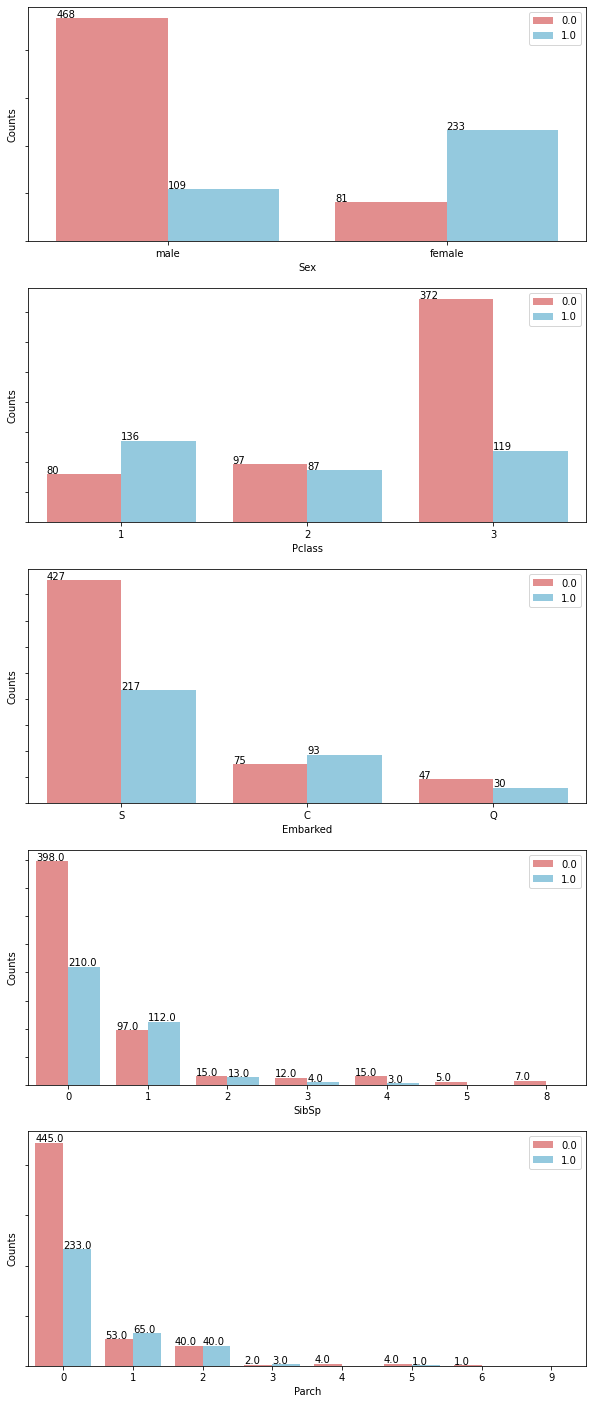

In [48]:
# Sex性別、Pclass票務艙、Embarked登船港口、SibSp兄弟姊妹配偶人數、Parch父母子女人數
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']

plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df_data[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( df_data[col], hue=df_data.Survived, palette=['lightcoral','skyblue'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )   # upper right:1 ; upper left:2
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

In [49]:
for col in selected_cols:
    l = ['Survived']
    l.append(col) 
    Survival_Rate = df_data[l].groupby(by=col).mean().round(4).reset_index()
    Survival_Rate.columns = [col,'Survival Rate(%)']
    Survival_Rate['Survival Rate(%)'] = Survival_Rate['Survival Rate(%)'].map( lambda x:x*100 )
    display( Survival_Rate )

,Sex,Survival Rate(%)
0,female,74.20
1,male,18.89


,Pclass,Survival Rate(%)
0,1,62.96
1,2,47.28
2,3,24.24


,Embarked,Survival Rate(%)
0,C,55.36
1,Q,38.96
2,S,33.70


,SibSp,Survival Rate(%)
0,0,34.54
1,1,53.59
2,2,46.43
3,3,25.00
4,4,16.67
5,5,0.00
6,8,0.00


,Parch,Survival Rate(%)
0,0,34.37
1,1,55.08
2,2,50.00
3,3,60.00
4,4,0.00
5,5,20.00
6,6,0.00
7,9,NaN


透過上列的長條圖(Bar Plot)與統計表，我們可得到下列的觀察：
*   女性的生存率明顯高於男性；
*   票務艙(Pclass)的生存率大小: Pclass 1 > Pclass 2 > Pclasss 3；
*   登船港口(Embarked)的生存率以 C 最高；
*   當船上的兄弟姐妹配偶人數(SibSp)有 1 人同行時，則生存率較高；
*   當船上的父母子女人數( Parch )為 1~3 人時，有較高的生存率。



與是否生存的欄位較相關的可以參考上面的熱力圖，比較不同參數的相關係數
排除無序的PassangerID, Ticket, Name, Cabin

*   Sex: 0.542
*   PClass: -0.34
*   Age: -0.077
*   SibSp: -0.035
*   Parch: 0.082
*   Fare: 0.26

相關係數比較高的有性別、艙等跟、票價







2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。

#Missing Values
在分析資料之前，我們還需先檢視資料是否存有缺漏值(Missing Values)，如果欄位存有缺漏值，之後在特徵工程(Feature Engineering)的過程中，我們可視欄位中缺漏值的比例或對預測值的相關性，決定填補或排除此欄位的處理方法。
透過我們自定義的函數 Missing_Counts ，發現 Embarked、Fare、Cabin、Age 欄位有缺漏值，當中， Cabin 欄位的缺漏情況最為嚴重，訓練集中約有 77%、測試集中約有 78% 的缺漏值，其次為 Age 欄位，訓練集中約有 20%、測試集中約有 21% 的缺漏值。

In [50]:
# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count

In [51]:
print( 'train :' )
display( Missing_Counts(df_train) )

print( 'test :' )
display( Missing_Counts(df_test) )

train :


,ColumnName,MissingCount,Percentage(%)
0,Embarked,2,0.22
1,Age,177,19.87
2,Cabin,687,77.10


test :


,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.24
1,Age,86,20.57
2,Cabin,327,78.23


針對存有缺漏值的欄位：Embarked、Fare、Cabin 及 Age 進行補值。一般而言，我們常選擇用平均值(Mean)、中位數(Median)或眾數(Mode)等補值，且利用 fillna( ) 函數來執行填補的動作，另外，較為進階的做法是透過機器學習模型進行補值，如：線性迴歸模型(Linear Regression)、決策樹(Decision Tree Regressor)等。
在補缺漏值前，我們再次查看整體資料的缺漏值分佈情況：

In [52]:
Missing_Counts( df_data.drop('Survived', axis=1) )

,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.08
1,Embarked,2,0.15
2,Age,263,20.09
3,Cabin,1014,77.46


票價(Fare) : 填補整體票價的中位數

In [53]:
df_data['Fare'].fillna( df_data.Fare.median(), inplace=True )

登船港口(Embarked) : 填補次數最多的港口 'S'

In [54]:
# 計算 Embarked 欄位中每個相異值的次數
display( df_data['Embarked'].value_counts() )
# 填補 Embarked 欄位的缺漏值
df_data['Embarked'].fillna( 'S', inplace=True )

S    914
C    270
Q    123
Name: Embarked, dtype: int64

#特徵工程(Feature Engineering)
在分析觀察完資料後，我們接著將處理一些無法直接餵入模型的特徵欄位，例如： Name 欄位為字串、Cabin 欄位中存有大量的缺漏值等

(1) 字串欄位處理

Name (姓名)
首先，我們可先觀察 Name 欄位，發現可以擷取出稱謂(Title)的資訊，來幫助提升模型預測的準確度。一般在處理字串資料時，常用的函數有 split( )、repalce( ) 等來分割或取代字串中的文字，再比較程式語法化的方法可參考正規表示法(Regular Expression)，這裏我們分別練習兩種方法：split( ) 與正規表示法，來擷取出 Name 欄位中的稱謂，產生的結果將僅有一個不同，其他皆完全相同：

In [76]:
# Method 1: split()
df_data['Title'] = df_data.Name.str.split(', ', expand=True)[1]
df_data['Title'] = df_data.Title.str.split('.', expand=True)[0]
df_data['Title'].unique()

AttributeError: ignored

In [61]:
# Method 2: 正規表示法(Regular Expression)
import re

regex = re.compile( ' ([A-Za-z]+)\.' )  
df_data['Title'] = df_data.Name.map( lambda x:regex.search(x)[0] )
# Dropping the first and the last words
df_data['Title'] = df_data.Title.map( lambda x:x[1:][:-1] )  
df_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

將同樣性別或關係的稱謂合併，避免產生某些稱謂僅有少數乘客，例如：Rev(Reverend)為牧師的尊稱、Countess為伯爵夫人等，影響模型的預測準確度。這裏我們將利用 replace( ) 函數，將上述擷取出的稱謂總歸為五類：Mr、Mrs、Miss、Master、Rare。

In [62]:
df_data['Title'] = df_data.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare' )
df_data['Title'] = df_data.Title.replace( ['Ms','Mlle'], 'Miss' )
df_data['Title'] = df_data.Title.replace( 'Mme', 'Mrs' )
df_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [63]:
# 刪除原始資料中的 Name 欄位 
df_data.drop( 'Name', axis=1, inplace=True )

船票號碼(Ticket)
另外，我們合理假設 Ticket 中，前面英文字母的部份代表房間位於相同的區域中，我們再次利用 split( ) 及 repalce( ) 函數，來擷取 Ticket 字串中前面英文字母的部份文字訊息，作為乘客艙房的位置分區。

In [64]:
df_data['Ticket_info'] = df_data.Ticket.apply( lambda x:x.replace('.','').replace('/','').strip().split(' ')[0] if not x.isdigit() else 'X')
df_data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [65]:
# 刪除原始資料中的 Ticket 欄位 
df_data.drop( 'Ticket', axis=1, inplace=True )

年齡(Age) :
因為 Age 欄位的缺漏值佔比約有 20% ，不像前面 Fare 及 Embarked 欄位中僅有少數不到 1% 的缺漏值，因此我們所填補缺漏的值可能會影響預測的結果。此時，我們先藉由 Age 搭配 Sex 或 Pclass 欄位，觀察缺漏值分布的情況，檢視缺漏值是否集中發生在某類特別的乘客當中？

In [55]:
# 新增標註 Age 欄位是否為缺漏值的欄位(有缺漏標為0)
df_data['isAge'] = df_data['Age'].isnull().map( lambda x:0 if x==True else 1 )

In [56]:
# 分別觀察 Age 與 Sex、Pclass 的缺漏值分布狀況
display( pd.crosstab( df_data.isAge, df_data.Sex, margins=True ) )
display( pd.crosstab( df_data.isAge, df_data.Pclass, margins=True ) )

Sex,female,male,All
isAge,,,
0,78,185,263
1,388,658,1046
All,466,843,1309


Pclass,1,2,3,All
isAge,,,,
0,39,16,208,263
1,284,261,501,1046
All,323,277,709,1309


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


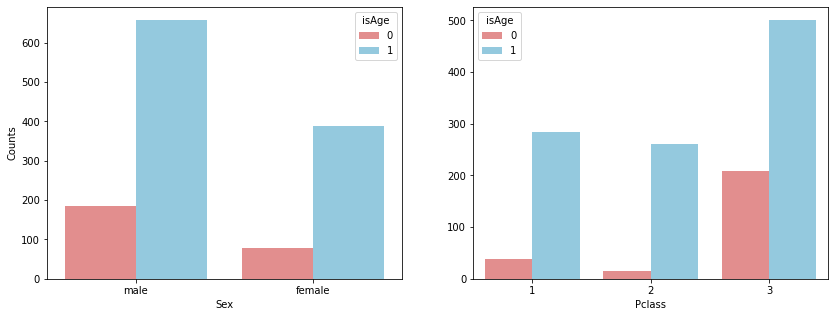

In [57]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
#plt.suptitle('Age')

plt.subplot(1,2,1)
sns.countplot( df_data.Sex, hue=df_data.isAge, palette=['lightcoral','skyblue'] )
plt.ylabel( 'Counts' ) 

plt.subplot(1,2,2)
sns.countplot( df_data.Pclass, hue=df_data.isAge, palette=['lightcoral','skyblue'] )
plt.ylabel( '' ) 

plt.show() 

經觀察上表及圖後可知，Age 欄位的缺漏值明顯分佈在 Pclass 3 中，約佔 29.34%(=208/709)，進一步觀察在 Pclass 1 及 Pclass 2 的乘客中，Age 欄位對於存活率是否有明顯的影響？

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


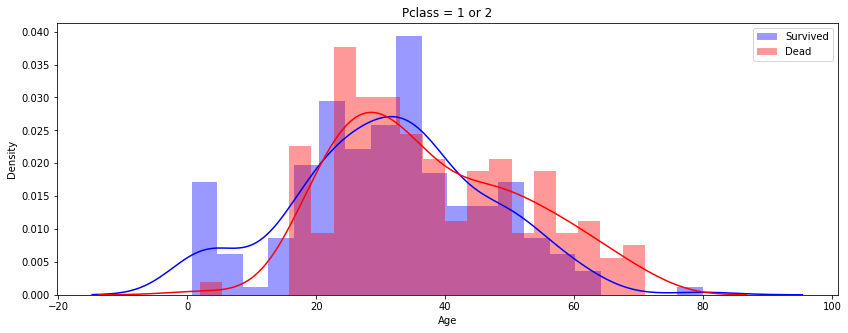

In [58]:
index_S = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==1)
index_D = (df_data.isAge==1)&(df_data.Pclass!=3)&(df_data.Survived==0)

plt.figure( figsize=(14,5) )
sns.distplot( df_data.loc[index_S,'Age'], bins=20, color='blue', label='Survived' )
sns.distplot( df_data.loc[index_D,'Age'], bins=20, color='red', label='Dead' )
plt.title( 'Pclass = 1 or 2' )
plt.legend( )
plt.show( )

從上圖可觀察到，在 Pclass 1 及 Pclass 2 的乘客中，年齡約小於 17 歲的乘客中有明顯較高的生存率，若年齡超過 17 歲則生存率並無明顯的差別，所以我們可大膽假設 Age 欄位與生存率具有關聯性，另外，因為年齡與稱謂(Title)也有相當程度的關聯，因此，我們將先計算每個稱謂的年齡平均值，再用此平均值來填補每個 Title 中所對應 Age 欄位的缺漏值。

In [66]:
# 計算每個 Title 的年齡平均值及中位數
Age_Mean = df_data[['Title','Age']].groupby( by=['Title'] ).mean()
Age_Median = df_data[['Title','Age']].groupby( by=['Title'] ).median()

Age_Mean.columns = ['Age Mean']
Age_Median.columns = ['Age Median']
Age_Mean.reset_index( inplace=True )
Age_Median.reset_index( inplace=True )

display( Age_Median )
display( Age_Mean )

,Title,Age Median
0,Master,4.0
1,Miss,22.0
2,Mr,29.0
3,Mrs,35.0
4,Rare,47.5


,Title,Age Mean
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.178571


In [67]:
# 利用每個 Title 的年齡平均數，填補每個 Title 所對應 Age 的缺漏值
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Master'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Master','Age Mean'][0]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Miss'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Miss','Age Mean'][1]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mr'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mr','Age Mean'][2]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mrs'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Mrs','Age Mean'][3]
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Rare'),'Age'] = Age_Mean.loc[Age_Mean.Title=='Rare','Age Mean'][4]

填滿 Age 欄位的缺漏值後，我們將年齡特徵再區分成未滿17歲及17歲以上，未滿17歲的乘客標為1，17歲以上的乘客標為0。

In [68]:
# 乘客年齡是否未滿17歲(是：1；否：0)
df_data[ 'is_Age_17' ] = (df_data.Age<17)*1
df_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isAge,Title,Ticket_info,is_Age_17
0,1,0.0,3,male,22.000000,1,0,7.2500,NaN,S,1,Mr,A5,0
1,2,1.0,1,female,38.000000,1,0,71.2833,C85,C,1,Mrs,PC,0
2,3,1.0,3,female,26.000000,0,0,7.9250,NaN,S,1,Miss,STONO2,0
3,4,1.0,1,female,35.000000,1,0,53.1000,C123,S,1,Mrs,X,0
4,5,0.0,3,male,35.000000,0,0,8.0500,NaN,S,1,Mr,X,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,32.252151,0,0,8.0500,NaN,S,0,Mr,A5,0
1305,1306,NaN,1,female,39.000000,0,0,108.9000,C105,C,1,Rare,PC,0
1306,1307,NaN,3,male,38.500000,0,0,7.2500,NaN,S,1,Mr,SOTONOQ,0
1307,1308,NaN,3,male,32.252151,0,0,8.0500,NaN,S,0,Mr,X,0


船艙號碼(Cabin) :
因爲整體 Cabin 欄位約有 77% 的缺漏值，我們在觀察 Cabin 欄位中的資料類別後，僅取出頭一個英文字母作為分類的標籤，其他缺漏的欄位以 NoCabin 表示。

In [69]:
# 觀察 Cabin 中的種類
df_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [70]:
# 取出 Cabin 中的第一個字母，如果為缺漏值，則以 NoCabin 表示
df_data['Cabin'] = df_data['Cabin'].apply( lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin' )
df_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

最後，在完成上述缺漏值的填補後，我們再次檢查是否還有缺漏值尚未填補到。



In [71]:
Missing_Counts( df_data.drop('Survived', axis=1) )

,ColumnName,MissingCount,Percentage(%)


4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

對於定性且無序的特徵欄位，例如：性別、顏色、國家別等，我們可利用 get_dummies( ) 函數執行OneHot Encoding，將其轉換成定量資料，這裏我們對 Embarked 欄位做OneHot Encoding；另外，因為女性的生存率明顯高於男性，故我們對 Sex 欄位做Label Encoding。

登船港口(Embarked) :

In [72]:
# OneHot Encoding
OneHot_Embarked = pd.get_dummies( df_data.Embarked, prefix='Embarked' )

# 合併 Embarked 編碼後的欄位
df_data = pd.concat( [ df_data, OneHot_Embarked ], axis=1 )
df_data.drop( 'Embarked', axis=1, inplace=True )

性別(Sex) :

In [79]:
# Label Encoding
Sex_mapping = { 'male':0, 'female':1 }
df_data[ 'Sex' ] = df_data.Sex.map( Sex_mapping )

5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

#特徵工程(Feature Engineering)
在分析觀察完資料後，我們接著將處理一些無法直接餵入模型的特徵欄位，例如： Name 欄位為字串、Cabin 欄位中存有大量的缺漏值等。

(1) 字串欄位處理

Name (姓名)

首先，我們可先觀察 Name 欄位，發現可以擷取出稱謂(Title)的資訊，來幫助提升模型預測的準確度。一般在處理字串資料時，常用的函數有 split( )、repalce( ) 等來分割或取代字串中的文字，再比較程式語法化的方法可參考正規表示法(Regular Expression)，這裏我們分別練習兩種方法：split( ) 與正規表示法，來擷取出 Name 欄位中的稱謂，產生的結果將僅有一個不同，其他皆完全相同：

In [ ]:
# Method 1: split()
df_data['Title'] = df_data.Name.str.split(', ', expand=True)[1]
df_data['Title'] = df_data.Title.str.split('.', expand=True)[0]
df_data['Title'].unique()

In [ ]:
# Method 2: 正規表示法(Regular Expression)
import re

regex = re.compile( ' ([A-Za-z]+)\.' )  
df_data['Title'] = df_data.Name.map( lambda x:regex.search(x)[0] )
# Dropping the first and the last words
df_data['Title'] = df_data.Title.map( lambda x:x[1:][:-1] )  
df_data['Title'].unique()

將同樣性別或關係的稱謂合併，避免產生某些稱謂僅有少數乘客，例如：Rev(Reverend)為牧師的尊稱、Countess為伯爵夫人等，影響模型的預測準確度。這裏我們將利用 replace( ) 函數，將上述擷取出的稱謂總歸為五類：Mr、Mrs、Miss、Master、Rare。

In [ ]:
df_data['Title'] = df_data.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare' )
df_data['Title'] = df_data.Title.replace( ['Ms','Mlle'], 'Miss' )
df_data['Title'] = df_data.Title.replace( 'Mme', 'Mrs' )
df_data['Title'].unique()

In [ ]:
# 刪除原始資料中的 Name 欄位 
df_data.drop( 'Name', axis=1, inplace=True )

船票號碼(Ticket)
另外，我們合理假設 Ticket 中，前面英文字母的部份代表房間位於相同的區域中，我們再次利用 split( ) 及 repalce( ) 函數，來擷取 Ticket 字串中前面英文字母的部份文字訊息，作為乘客艙房的位置分區。

In [ ]:
df_data['Ticket_info'] = df_data.Ticket.apply( lambda x:x.replace('.','').replace('/','').strip().split(' ')[0] if not x.isdigit() else 'X')
df_data['Ticket_info'].unique()

In [ ]:
# 刪除原始資料中的 Ticket 欄位 
df_data.drop( 'Ticket', axis=1, inplace=True )

最後，請將資料接著執行下方範例，產生新的結果之後並且截圖且存成一次新的 Commit。

在完成前述的資料分析及特徵工程後，我們就快可以把資料餵入模型進行訓練了！在此之前的最後一個注意步驟，就是需確認每個欄位皆為數值型態，且將資料分割回訓練集(train)與測試集(test)。所以，此時我們先檢視特徵工程後的資料，觀察是否還有需要處理的欄位：

In [80]:
# 檢視特徵工程後的資料
print( f'Shape of data after feature engineering = {df_data.shape}' )
df_data.head()

Shape of data after feature engineering = (1309, 16)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,isAge,Title,Ticket_info,is_Age_17,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,NaN,22.0,1,0,7.2500,NoCabin,1,Mr,A5,0,0,0,1
1,2,1.0,1,NaN,38.0,1,0,71.2833,C,1,Mrs,PC,0,1,0,0
2,3,1.0,3,NaN,26.0,0,0,7.9250,NoCabin,1,Miss,STONO2,0,0,0,1
3,4,1.0,1,NaN,35.0,1,0,53.1000,C,1,Mrs,X,0,0,0,1
4,5,0.0,3,NaN,35.0,0,0,8.0500,NoCabin,1,Mr,X,0,0,0,1


檢視後發現，因為我們之前有處理過字串欄位，所以資料中還存有 4 欄類別型態的欄位：Cabin、Embarked、Title、Ticket_info，因此，我們也需要將它們轉換成數值型態欄位：

In [81]:
for col in ['Title','Ticket_info','Cabin']:
    df_data[col] = df_data[col].astype('category').cat.codes

df_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,isAge,Title,Ticket_info,is_Age_17,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,NaN,22.0,1,0,7.2500,7,1,2,2,0,0,0,1
1,2,1.0,1,NaN,38.0,1,0,71.2833,2,1,3,14,0,1,0,0
2,3,1.0,3,NaN,26.0,0,0,7.9250,7,1,1,31,0,0,0,1
3,4,1.0,1,NaN,35.0,1,0,53.1000,2,1,3,36,0,0,0,1
4,5,0.0,3,NaN,35.0,0,0,8.0500,7,1,2,36,0,0,0,1


最後，我們將整體資料分割回訓練集與測試集兩部份，訓練集用來餵入模型進行訓練，測試集則為模型最終要預測的結果，此外，在分割產出資料後，我們刪除與生存率無毫關聯性的欄位 PassengerId。

In [82]:
# 產生訓練集和測試集
Train = df_data[ pd.notnull(df_data.Survived) ]
Test = df_data[ pd.isnull(df_data.Survived) ]

# 訓練集刪除 PassengerId 欄位；
# 測試集刪除 PassengerId 與 Survived 欄位
Train.drop( ['PassengerId'], axis=1, inplace=True )
Test.drop( ['PassengerId','Survived'], axis=1, inplace=True )

# 將測試集中的標籤欄位 Survived 單獨拆出
Y_Train = Train.Survived
X_Train = Train.drop( ['Survived'], axis=1 )

print( f'Shape of X_Train = {X_Train.shape}' )
print( f'Shape of Y_Train = {Y_Train.shape}' )
print( f'Shape of Test = {Test.shape}' )

Shape of X_Train = (891, 14)
Shape of Y_Train = (891,)
Shape of Test = (418, 14)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
columns_X = set(Train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = Train[columns_X]
train_y = Train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

array([nan, nan, nan, nan, nan])